<a href="https://colab.research.google.com/github/jinsusong/study-NLP-IEEE-Paper/blob/main/A_Text_Classification_Method_Based_on_Graph_Attention_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Text Classification Method Based on Graph Attention Networks

# abstract 

- 순차 및 그래프 기반 딥 러닝 모델은 NLP(자연어 처리)에서 자주 사용됩니다. 

- 순차 모델은 일반적으로 RNN(Recurrent Neural Network), CNN(Convolutional Neural Network) 및 BERT(Bidirectional Encoder Representations from Transformers)를 사용합니다. 

- 그래프 기반 깊이 모델은 분류를 위한 텍스트와 텍스트의 특성을 학습하기 위해 텍스트 간의 동시 발생 관계를 사용합니다. 

1. RNN을 이용하여 사전에 텍스트의 특징을 그래프의 노드로 계산하고, 

2. 텍스트 간의 수정 관계를 이용하여 그래프를 구성하고, 

3. 그래프 모델을 사용하여 텍스트 범주를 예측하는 데 사용되는 최종 텍스트 기능을 얻습니다. 

4. 다양한 방법과 실험을 비교한 결과 감정 분류에 사용된 텍스트 데이터 세트에서 본 논문의 방법이 더 나은 결과를 얻었고 정확도는 82.03%에 달했다.

#Related Wordk

1. Passalis N et al. [11] 은 텍스트를 벡터로 변환하고 모델에 많은 양의 텍스트 입력을 사용하여 텍스트 간의 상관 관계를 캡처하는 Word2vec 모델을 제안하면서 bag-of-word의 단점을 피했습니다. 

2. Vo AD 등 People [15] 은 구문 기능을 배우기 위해 종속성 구문 분석기를 word2vec와 결합했습니다. 

3. Melamud et al. [10] 은 텍스트 기능이 컨텍스트 정보를 포함하도록 만든 context2vec를 제안했고 

4. ME Peters et al. [12] 양방향 언어 모델 Features, 

5. Luan Y et al. [9] 는 CNN 모델을 텍스트 분류에 적용했으며 이러한 방법은 자연어 처리 작업에서 좋은 성능을 보입니다.

6. 자연어 처리 작업에 대한 GNN 모델의 응용 연구도 최근 몇 년 동안 상당한 진전을 이루었습니다. 

7. Chiang WL et al. [1] 은 그래프 컨볼루션 네트워크(GCN) 모델을 제안했습니다. 
GCN 모델은 노드와 인접 노드 간의 집계를 사용하여 노드의 특성을 업데이트하는 다계층 아키텍처입니다. 지식 그래프와 인용 네트워크에 있습니다. 좋은 분류 효과를 얻었습니다. 

8. Velicković P et al. [14] 주의 및 다중 헤드 메커니즘을 추가한 그래프 주의 네트워크(GAT) 모델 제안 [8]GCN에. 집계 단계에서는 각 노드에 다른 중요도가 부여되며 효과는 GCN을 초과합니다. 

9. 나중에 누군가 GNN과 종속성 파서를 결합하여 측면 수준 감정 분류 [5] , [6] 및 단어 임베딩 [16] 에 적용 했습니다. 

10. Yao Let al. [18] 은 GCN을 일반 텍스트 분류로 확장하기 위해 텍스트 GCN을 제안했습니다.

# Propose

본 논문에서는 의존성 파서를 GAT와 결합하여 일반 텍스트 분류에 적용하고 TextGCN과 비교하여 더 나은 분류 효과를 얻고자 한다.

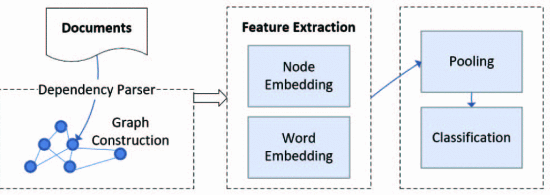

1. 의존성 파서를 이용하여 텍스트 내 각 텍스트의 수정 관계를 추출하고, 

2. 위 관계를 이용하여 그래프의 에지를 구성하고, 텍스트 내의 텍스트를 그래프의 노드로 사용한다. 

3. Feature Extraction 단계에서 먼저 RNN 모델을 사용하여 단어 임베딩을 얻는다.

4. 이를 초기 노드 임베딩으로 사용하고 그래프와 함께 GAT 모델에 입력하여 새 노드(단어) 임베딩을 얻습니다. 

5. 마지막으로 Pooling 단계에서는 전체 문서의 특징인 Embedding pooling을 분류에 입력합니다.

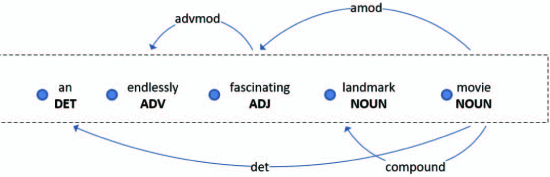

의존성 파서의 결과
- 영화와 같이 다른 텍스트를 수정하지 않는 루트 텍스트가 있고 

- 매혹적인, 랜드마크와 같은 다른 텍스트를 수정하는 텍스트가 있음.

- 영화 단어를 수정하기 위해 끝없이 매혹적인 수정, 우리는 이 관계를 사용하여 향후 그래프를 구축할 것입니다.



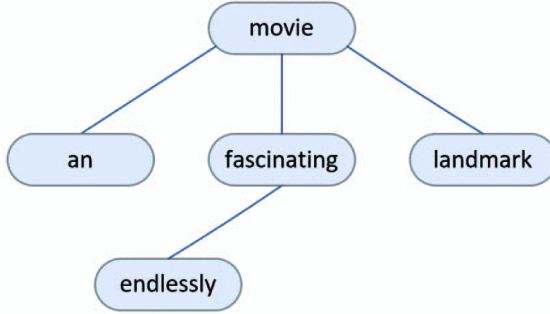

완성된 그래프
- 종속성 파서의 원래 수정 관계는 방향성입니다. 

- 여기서 우리는 그것을 제거하고 무향 모서리로 변경합니다. 

- 에지의 방향은 이후 모델에 의해 학습되어 처리됩니다. 

- 노드가 다른 노드로 이동하지 않는 경우 가장자리의 가중치 값은 0입니다. 

- 텍스트 기능의 조합에서 영화는 더 많은 특징, 매혹적, 랜드마크를 가질 것이며 끝없이 영화의 2-홉 이웃입니다. 

- 두 텍스트 사이에는 직접적인 관계가 없으며 결과 기능은 상대적으로 작습니다. 매혹적이라는 점에서, 무향 관계로 인해 영화의 특성과 끝없이 결합하여 노드 임베딩을 배울 수 있습니다.

#Experiment

 MR, R8, R52 및 Ohsumed를 포함하여 Text GCN [18] 에서 사용하는 데이터 세트를 참조

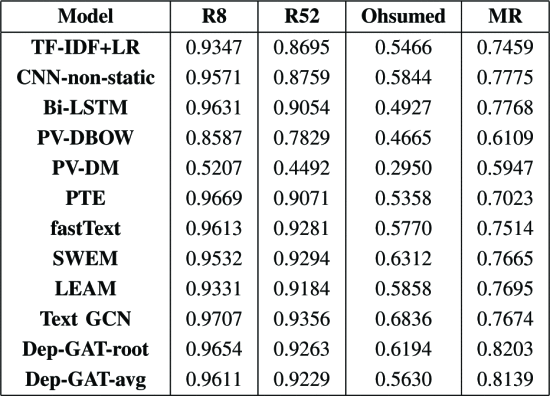

1. MR 데이터 세트는 영화 리뷰로 주로 감정 분류로 사용되며 긍정적 감정 5331개, 부정적 감정 5331개를 포함한다. 

2. R8 및 R52는 Reuters-21578 데이터의 일부이며 8 및 52 범주는 각각 데이터 세트로 사용됩니다. 

3. Ohsumed는 의학 초록입니다. 필터링 후 각 기사는 하나의 심혈관 질환만 설명하며 총 23개의 범주가 있습니다. 

4. 각 데이터 세트에 대해 10회 실행의 평균 및 표준 편차를 계산

1. TF-IDF+LR은 : TF-IDF를 텍스트 기능으로 사용하고 로지스틱 회귀 분류를 사용하고 

2. LDA+LR은 텍스트의 주제 분포를 기능으로 사용하여 로지스틱 회귀 분류에 입력하는 전통적인 모델입니다. 

3. 순차적 딥 러닝 모델에는 CNN [9] 및 bi-LSTM [7] 이 포함되고, PV-DBOW 및 PV-DM은 doc2vec [2] 이며, 텍스트는 벡터 세트로 표시되며 분류에는 로지스틱 회귀가 사용됩니다. 

4. PTE [13] , fastText [4] , SWEM 및 LEAM [17] 다양한 방법을 사용하여 단어 임베딩을 학습하고 텍스트의 모든 단어 임베딩 평균을 추가하거나 다른 풀링 방법을 사용하여 텍스트의 벡터를 계산합니다. 

5. 그래프 딥 러닝의 모델은 TextGCN입니다.[18] . 

6. Dep-GAT-root 및 Dep-GAT-avg는 이 기사에서 제안하는 방법

실험 결과
1. Dep-GAT-root가 MR 데이터 세트에서 좋은 결과를 얻었음을 보여줍니다. 정확도는 0.8203입니다. 

2. BiRNN은 짧은 텍스트에서 좋은 결과를 얻을 수 있습니다. 동시에 그래프로 학습된 임베딩도 분류에 도움이 될 수 있습니다. 그러나 R8, R52, Ohsumed의 점수는 Text GCN만큼 좋지 않습니다. 그 이유는 LSTM과 GRU만으로는 긴 텍스트 요약에 그다지 효과적이지 않고, 종속성 파서의 구조가 일반적인 텍스트 분류에 중요하지 않기 때문일 수 있습니다. 위의 특징 추출에서 종속성 파서는 문장의 본문으로 간주될 수 있는 루트 텍스트(즉, 수정됨)를 찾아 모든 모델에서 분류 효과가 최고는 아니지만 유지될 수 있습니다. 평균 수준에서.

Dep-GAT-root의 결과는 Tab에 표시됩니다. Ⅱ . 서로 다른 수의 컨볼루션(L)은 각 노드의 업데이트 수를 나타내며 각 노드가 결합하는 인접 특징의 홉 수를 나타냅니다.

L=0일 때 영화 노드는 다른 노드 특징을 얻지 못하고, L=1일 때 1홉 이웃의 특징을 가지며, 너무 많은 회선은 더 많은 노이즈를 가져옵니다. 

노드 임베딩 결합 과정은 그림 4 와 같다 . R8, R52 및 Ohsumed에서 루트를 얻고 루트 텍스트 기능을 수정하는 것은 분류의 한계에 도달했습니다. 

MR에서는 더 많은 수정자 기능이 필요할 수 있으며 이러한 수정자는 감정과 관련이 있으므로 더 많은 수의 컨볼루션이 필요합니다.

#Conclusion

이 글은 의존성 파서와 GAT의 조합을 텍스트 분류에 적용하려고 한다. 

감정 분류 데이터 세트에서 종속성 파서는 분류 효과를 0.810 정확도로 향상시킬 수 있습니다. 

실험은 다양한 데이터 세트를 다양한 방법과 비교한 결과, 

이 기사가 감성 분류에 사용된 텍스트 데이터 세트에 대해 더 나은 결과를 얻었고 정확도는 82.03%에 도달했음을 보여줍니다. 

그러나 일반적인 텍스트 분류에서 이 수정된 관계는 큰 변화를 일으키지 않았습니다. 그래프를 구성하는 과정에서 의존 관계를 사용하지 않고, 노드 임베딩과 결합된 주의를 사용했습니다. 미래에는 다른 방법을 사용하여 계산에 관계 기능을 추가하고 감정 분류 관련 작업에서 사용할 수 있습니다.

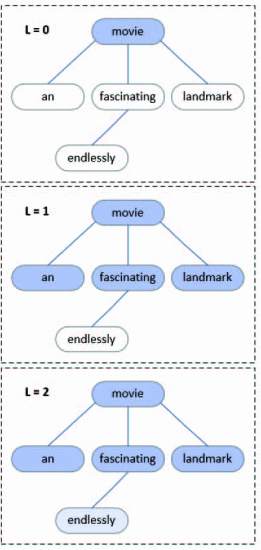

출처 : https://ieeexplore.ieee.org/document/9694328
